In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from matplotlib.widgets import Slider, Button, RadioButtons
import pint

plt.style.use(['science', 'notebook'])
u = pint.UnitRegistry()

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
#Define the radiating point source
def point_source(x=0,y=0,wavelength=500*u.nm, amplitude = 1):
    wavenumber = (2*np.pi / wavelength)
    return amplitude * np.exp(1j * wavenumber * np.sqrt(x**2 + y**2))

/home/marshall/miniconda3/envs/fourier_optics/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:701: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


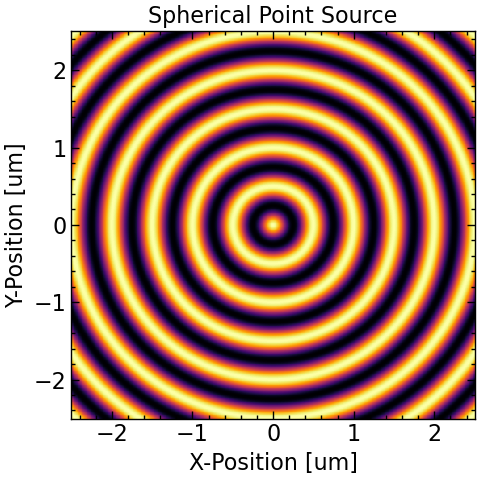

In [4]:
#Test our point source with a meshgrid

#Wavelength of interest
wavelength = 500*u.nm

yoffset = 0*u.um
xoffset = 0*u.um

resolution = 500 #Might need to adjust this
x = np.linspace(-2.5, 2.5, resolution) * u.um
xx,yy = np.meshgrid(x,x)

#Run the point source with the meshgrid
z = point_source((xx-xoffset),(yy-yoffset),wavelength)

plt.figure(figsize=(5,5))
im1 = plt.pcolormesh(xx,yy,np.real(z.magnitude), cmap='inferno')
plt.title('Spherical Point Source')
plt.xlabel('X-Position [um]')
plt.ylabel('Y-Position [um]')
plt.tight_layout()
plt.show()

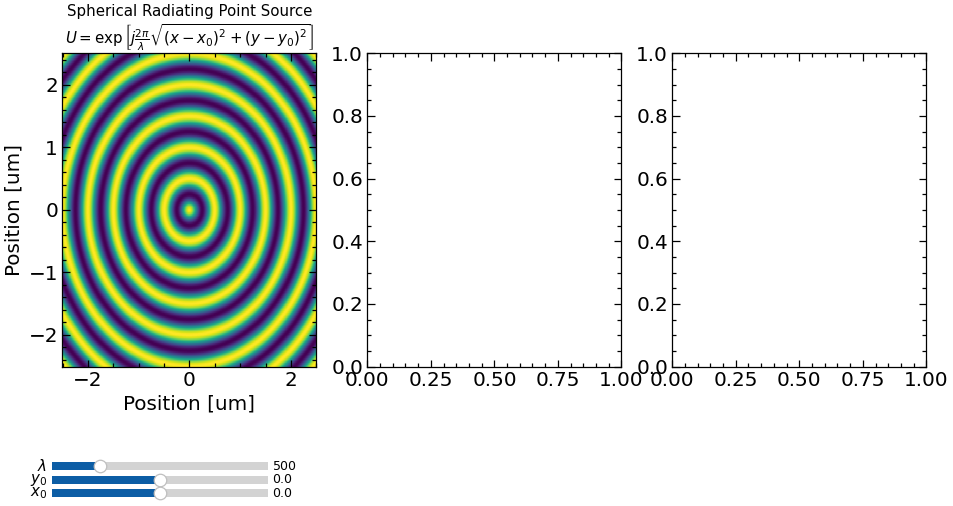

In [17]:
#Plot the things  

#Define the figure
fig,ax = plt.subplots(1,3,figsize=(12,6), dpi=90)

#
ax[0].set_title("Spherical Radiating Point Source\n"\
            r"$U = \exp{\left[j\frac{2\pi}{\lambda}\sqrt{(x-x_0)^2 + (y-y_0)^2}\right]}$", fontsize=12
)
ax[0].set_xlabel("Position [um]") #The units are hard coded - need a function to determine them
ax[0].set_ylabel("Position [um]")

#Set intial plot
im0 = ax[0].pcolormesh(xx,yy,np.real(z.magnitude))

#Make room for sliders
fig.subplots_adjust(left= 0.1,bottom = 0.3)

#Define some sliders
wavelength_slider_ax = fig.add_axes([0.09, 0.1, 0.2, 0.03])
wavelength_slider = Slider(wavelength_slider_ax, r'$\lambda$', (200*u.nm).magnitude, (1550*u.nm).magnitude, valinit=wavelength.magnitude)
wavelength_slider.label.set_size(12)

yoffset_slider_ax = fig.add_axes([0.09, 0.075, 0.2, 0.03])
yoffset_slider = Slider(yoffset_slider_ax, r"$y_0$", (-2.5*u.um).magnitude, (2.5*u.um).magnitude, valinit=yoffset.magnitude)
yoffset_slider.label.set_size(12)

xoffset_slider_ax = fig.add_axes([0.09, 0.05, 0.2, 0.03])
xoffset_slider = Slider(xoffset_slider_ax, r"$x_0$", (-2.5*u.um).magnitude, (2.5*u.um).magnitude, valinit=xoffset.magnitude)
xoffset_slider.label.set_size(12)

#def sliders_on_changed(val):
#    z = point_source((xx-xoffset_slider),(yy-yoffset_slider.val),wavelength_slider.val)
#    im0.set(array=np.real(z.magnitude))
#    im0.draw()
#    fig.canvas.draw_idle()
    
wavelength_slider.on_changed(sliders_on_changed)
yoffset_slider.on_changed(sliders_on_changed)
xoffset_slider.on_changed(sliders_on_changed)



plt.show()

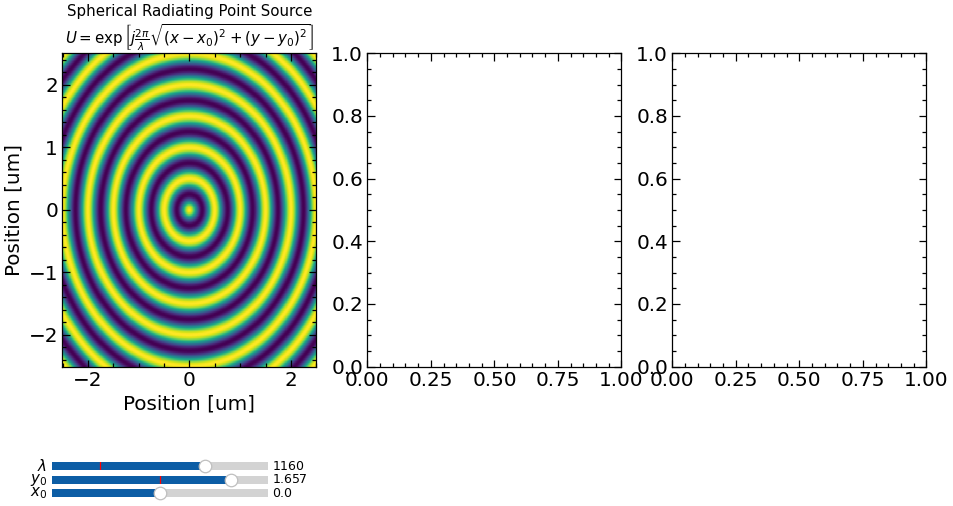

In [13]:
plt.show()

In [9]:
yoffset_slider.val

0.8699356361671731